# Progress Report (14th November 2025)

Rithvik Hari Prasad     rhari7@uic.edu        Rithvik008 <br>
Dheeraj Malle Rudrappa  dmall6@uic.edu      dheerajmr01<br>
Madhumitha Seshaiah     msesh@uic.edu        madhu27aa<br>
Sanjana Venkatesh       svenk62@uic.edu   sanjana0190<br>
L Sravya  Rachakonda    lrach@uic.edu           sravya1802


## Introduction

Crowdfunding has emerged as a critical financial lifeline in India, democratizing access to capital for medical emergencies, educational pursuits, and social causes. This project investigates the dynamics of successful fundraising by analyzing a dataset obtained from Milaap, India’s largest crowdfunding platform. As digital philanthropy grows, understanding the underlying factors that compel strangers to donate becomes essential for organizers seeking to maximize their impact and for platforms aiming to optimize donor engagement.

The dataset comprises a diverse collection of crowdfunding campaigns, capturing granular details such as financial targets, total funds raised, donor counts, and campaign categories (e.g., medical, community, education, pets). Beyond simple financial metrics, the data includes qualitative and behavioral features, including the frequency of campaign updates, the presence of verified supporting documents, the textual content of campaign descriptions and many more.

Through statistical analysis and machine learning, we seek to provide data-driven insights into the behavioral economics of crowdfunding in India.

## Any changes since the proposal

No change

## Data

The data was webscraped from the Milaap Website using code in python. The python code involved using beautiful soup which was indeed quite beutiful and selenium which made a new browser window where the main parsing was done by the program.

### <span style="color:#007acc; font-weight:bold;">How was the Webscraping performed? Did we know what we were doing?</span>
Not at first. It took some time to understand the complex structure of the data and how it was stored on the website. But we knew this getting into because its one of the key disadvantages of using web scraping for data (plus the noise). But along the way we did get to know a lot about the process.

The main issue we faced in the beginning was finding a website that doesnt have too many restrictions on accessing the data. We went through quite a few websites before coming across milaap. Ill go into why we chose milaap in more detail below.

Now, lets get into how the website has the data and what tricks we used to get past some constraints.


### Below is the website main page

Figure 1 (Figures in end)

We particularly chose this website because it had all the campaigns on one url but paginated. We can access the other pages by the 'See More Fundraisers' link which appears after every 9 fundraiser cards as shown in the image below.

This was handled by using selenium, which opened a new browser window where the program kept traversing all the cards and if there was any occurance of the link 'See more fundraisers', then it was clicked for loading more of the fundraisers. This was done until end of the page, till there were no more fundraiser cards.

Figure 2 (Figures in end)

With this we had successfully achieved accessing all the campaign data from the main page but there was obviously an ocean of data which we could get after entering each campaign's individual page. Some websites did have some restriction with accessing that page using a program but luckily for us, milaap did not.

As a backup plan, we had decided to just use the data we could extract from the cards on the main page if we were not capable of accessing the individual page data.

These points along with the fact that this site had varied categories of data (medical, education, etc) were the reasons for chosing this site.

### The data on the main campaign page is shown in the image below

Figure 3 (Figures in end)

### While web scraping we came across some links attached to each campaign page (given in image below).

Figure 4 (Figures in end)

### These links were found to be API endpoints where all the data was neatly arranged for us in a json format.

The below image is an example of one of the verification details.json endpoint

Figure 5 (Figures in end)

With all these steps we put together a code which extracts all of this data. It ran for nearly 5-6 hours but at the end it gave a dataframe which was a combination of text, numerical and categorical data.

In [3]:
import pandas as pd
df=pd.read_csv('fundraiser_final_all.csv')

In [ ]:
df.columns

Index(['Link', 'Image', 'Motivation', 'Progress', 'Raised', 'Created By',
       'category', 'Target', 'Amount', 'has_tax_benefit', 'num_donations',
       'max_donation_inr', 'min_donation_inr', 'avg_donation_inr',
       'num_anonymous', 'max_anon_inr', 'min_anon_inr', 'avg_anon_inr',
       'description', 'supportingDocuments', 'supportingDocumentsStatus',
       'medicalCause', 'medicalCauseStatus', 'kycDocuments',
       'kycDocumentsStatus', 'fundUtilization', 'fundUtilizationStatus',
       'top_referrer_name', 'top_referrer_count', 'top_referrer_profile',
       'updates_count', 'update_1_description', 'update_1_type',
       'update_1_date', 'update_2_description', 'update_2_type',
       'update_2_date', 'update_3_description', 'update_3_type',
       'update_3_date'],
      dtype='object')

## Now some visualizations of the data

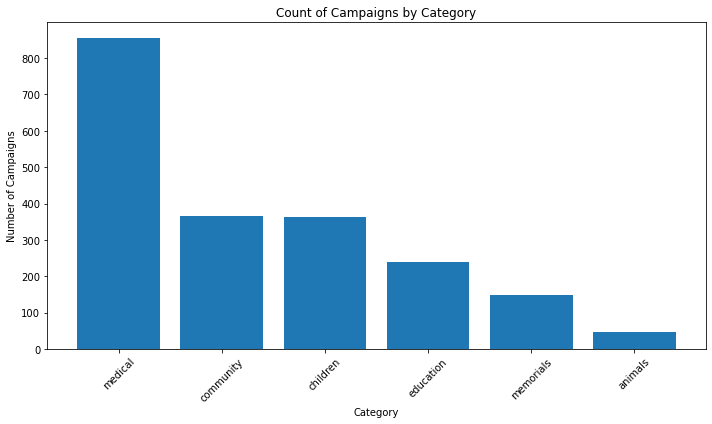

In [ ]:
import matplotlib.pyplot as plt
category_counts = df['category'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Category")
plt.ylabel("Number of Campaigns")
plt.title("Count of Campaigns by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['Progress']=df['Progress'].str.replace('%','',regex=False).astype(float)

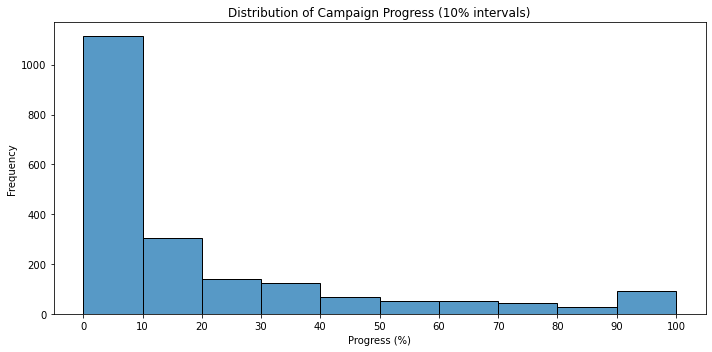

In [ ]:
import numpy as np
import seaborn as sns

bins = np.arange(0, 110, 10)

plt.figure(figsize=(10,5))
sns.histplot(df['Progress'], bins=bins)

plt.title("Distribution of Campaign Progress (10% intervals)")
plt.xlabel("Progress (%)")
plt.ylabel("Frequency")

plt.xticks(bins)
plt.tight_layout()
plt.show()


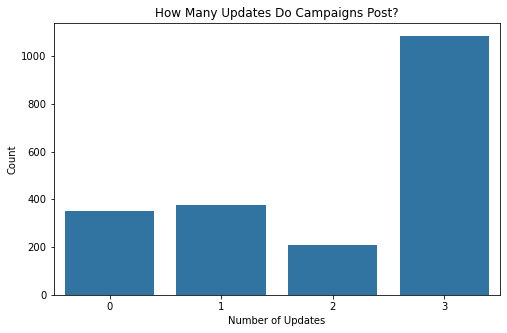

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='updates_count', data=df)
plt.title("How Many Updates Do Campaigns Post?")
plt.xlabel("Number of Updates")
plt.ylabel("Count")
plt.show()

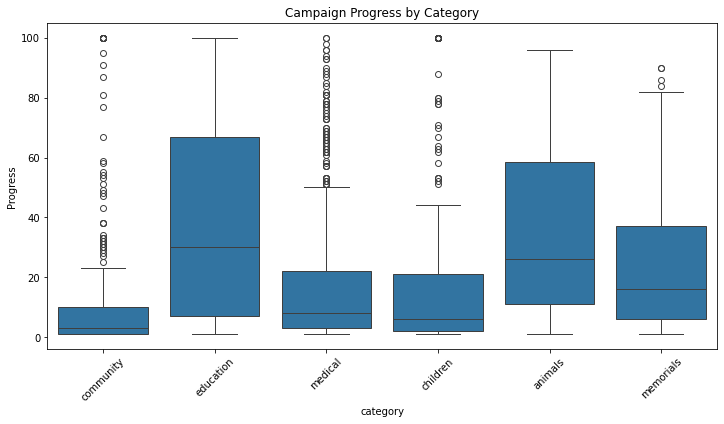

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='category', y='Progress', data=df)
plt.xticks(rotation=45)
plt.title("Campaign Progress by Category")
plt.show()

In [ ]:
import re
def clean_goal(x):
    if pd.isna(x):
        return None
    x = re.sub(r'[^0-9]', '', x)
    return int(x) if x.isdigit() else None

df["goal_clean"] = df["Target"].apply(clean_goal)
df["amount_clean"]=df["Amount"].apply(clean_goal)

In [ ]:
df['goal_clean'].unique

<bound method Series.unique of 0           30000
1           30000
2           10000
3           30000
4           10000
          ...    
2012     10000000
2013     15000000
2014      3000000
2015    150000000
2016      1000000
Name: goal_clean, Length: 2017, dtype: int64>

In [ ]:
df['amount_clean'].unique

<bound method Series.unique of 0           101
1            52
2            57
3            60
4            20
         ...   
2012    1422737
2013    4623801
2014    1462476
2015    1956586
2016     643773
Name: amount_clean, Length: 2017, dtype: int64>

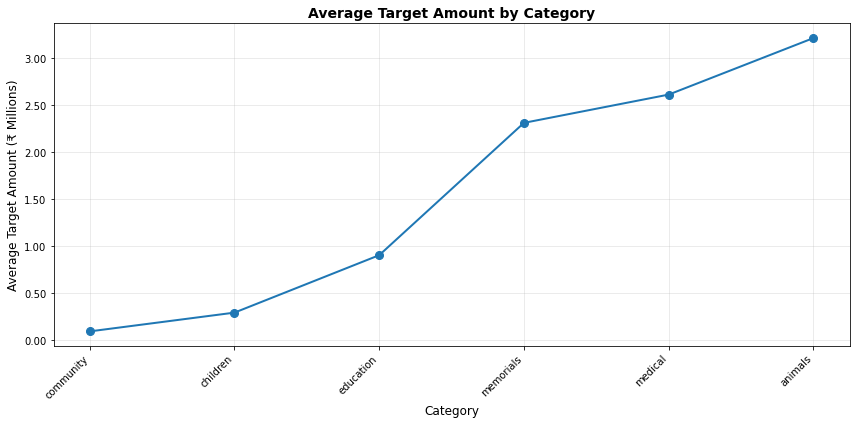

category
community    9.532330e+04
children     2.947714e+05
education    9.056016e+05
memorials    2.312568e+06
medical      2.613149e+06
animals      3.214167e+06
Name: goal_clean, dtype: float64


In [ ]:
import matplotlib.ticker as mticker

avg_target_by_category = df.groupby('category')['goal_clean'].mean().sort_values()
plt.figure(figsize=(12, 6))
plt.plot(avg_target_by_category.index, avg_target_by_category.values, marker='o', linewidth=2, markersize=8)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Target Amount (₹ Millions)', fontsize=12)
plt.title('Average Target Amount by Category', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Format y-axis to show values in millions
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x/1e6:.2f}'))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print(avg_target_by_category)

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


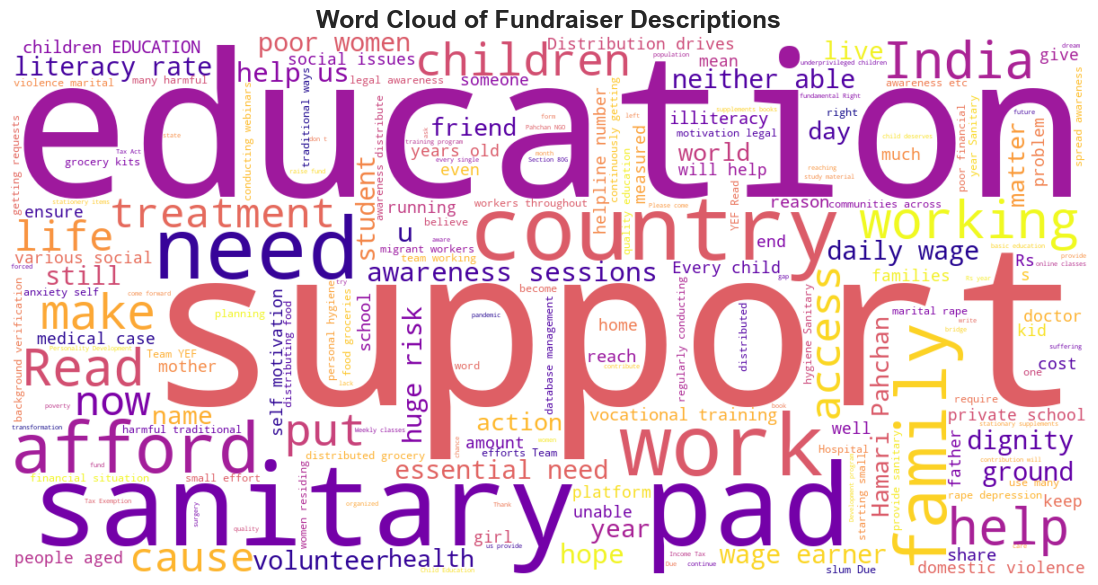

In [27]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all description text into one string (drop missing values)
text_data = " ".join(df['description_text'].dropna().astype(str))

# Create stopwords list (add any additional words if needed)
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=stopwords,
    colormap='plasma',
    collocations=True
).generate(text_data)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Fundraiser Descriptions", fontsize=18, weight='bold')
plt.show()


## Exploratory Data Analysis

We went into the analysis step blind, not intending to find any trends we wanted to see in the data but to see what was actually there.

After going throught the data, each of us made our hypothesis that we feel would be correct (promise no p-hacking).

### Hypothesis by Rithvik

I feel people are more inclined to donate to campaigns in medical domain i.e. people asking donations for surgeries and other medical expenses. People are more prone to giving money for health concerns because there is more at stake. It is hard to say people will give MORE MONEY, a better insight might be that MORE people feel justified in donating money in such circumstances. I will be checking number of donation to the categories with my main hypothesis being on the medical domain.

Null Hypothesis (H0): The number of donations in medical and non-medical categories are the same <br>
μ_medical=μ_non_medical

Alternative Hypothesis (Ha): Medical campaigns have more donations <br>
μ_medical>μ_non_medical

In [ ]:
category_counts = df['category'].value_counts()
print(category_counts)

medical      855
community    365
children     363
education    239
memorials    148
animals       47
Name: category, dtype: int64


In [ ]:
df.groupby('category')['num_donations'].mean().sort_values(ascending=False)

category
animals      247.851064
medical      161.139181
memorials    114.175676
children      44.597796
community     40.602740
education     35.661088
Name: num_donations, dtype: float64

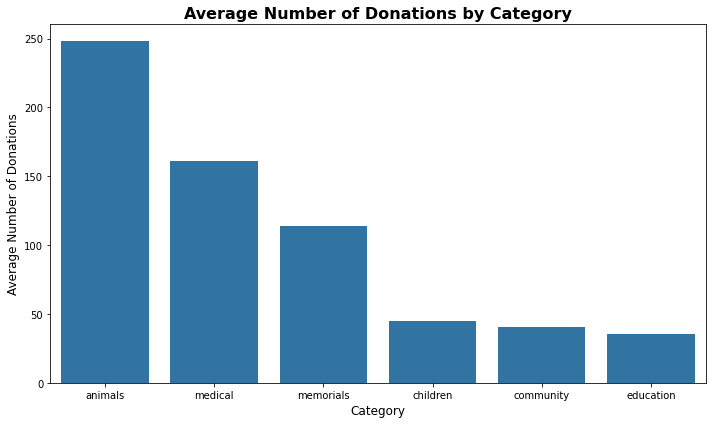

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_donations_by_cat = df.groupby('category')['num_donations'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    y=avg_donations_by_cat.values,
    x=avg_donations_by_cat.index,
)

plt.title('Average Number of Donations by Category', fontsize=16, fontweight='bold')
plt.ylabel('Average Number of Donations', fontsize=12)
plt.xlabel('Category', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pointbiserialr
import pandas as pd

cat_dummies = pd.get_dummies(df['category'], prefix='cat')

for col in cat_dummies.columns:
    corr, p = pointbiserialr(cat_dummies[col], df['num_donations'])
    print(f"Correlation ({col} vs num_donations): {corr:.4f}, p-value = {p:.4e}")

Correlation (cat_animals vs num_donations): 0.0614, p-value = 5.8035e-03
Correlation (cat_children vs num_donations): -0.0734, p-value = 9.7015e-04
Correlation (cat_community vs num_donations): -0.0788, p-value = 3.9863e-04
Correlation (cat_education vs num_donations): -0.0664, p-value = 2.8573e-03
Correlation (cat_medical vs num_donations): 0.1382, p-value = 4.5942e-10
Correlation (cat_memorials vs num_donations): 0.0093, p-value = 6.7645e-01


### cat_medical vs num_donations p-value = 0.00000000045942

The p-value is quite low so we can say that null hypothesis is false and the alternative hypothesis provides a better explanation of the observed data. So we can reject the null hypothesis and say that the alternative hypothesis is a better view based on the data. The correlation is also positive compared to the others having negative correlation or less positive correlations.

But the number of campaigns of medical are way more than the rest of the categories and may have something to do with skewing the data.

Such imbalances can be corrected by including synthetic data (like talked about in the LLM lecture in class).

### Hypothesis by Dheeraj M R

Donations are always no strings attached, but most people who donate also look for some sort of benefits such as a Tax-break.Hence I wanted to probe into this and wanted to find out how much it factors in to receiving donations.
$$
H_0 : \text{Tax benefits have no effect or decrease donations.}
$$
$$
H_a : \text{Fundraisers with tax benefits will get more donations.}
$$

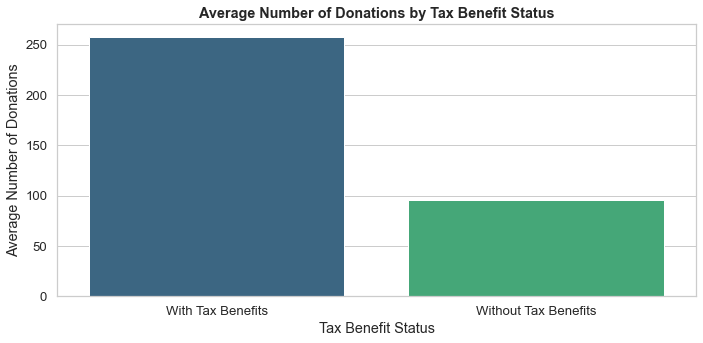

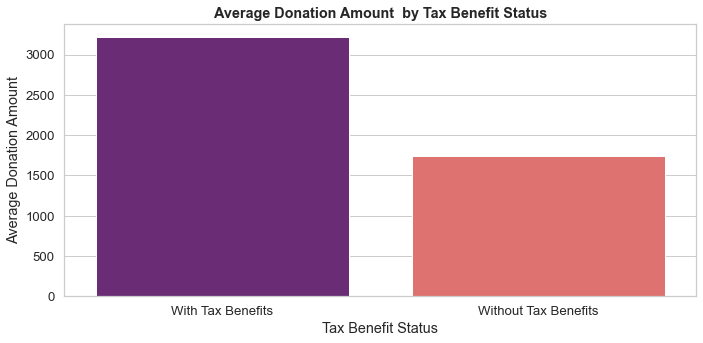

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_all_data = pd.read_csv('fundraiser_final_all.csv')


df_all_data['has_tax_benefit_label'] = df_all_data['has_tax_benefit'].apply(
    lambda x: 'With Tax Benefits' if x else 'Without Tax Benefits'
)


df_grouped = df_all_data.groupby('has_tax_benefit_label').agg(
    avg_num_donations=('num_donations', 'mean'),
    avg_donation_inr=('avg_donation_inr', 'mean')
).reset_index()
sns.set_theme(style="whitegrid", font_scale=1.2)


# --- Chart 1: For Average Number of Donations ---
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_grouped,
    x='has_tax_benefit_label',
    y='avg_num_donations',
    hue='has_tax_benefit_label',
    palette='viridis',
    legend=False
)
plt.title('Average Number of Donations by Tax Benefit Status', fontweight = 'bold')
plt.xlabel('Tax Benefit Status')
plt.ylabel('Average Number of Donations')
plt.tight_layout()
plt.show()


# --- Chart 2: For Average Donation Amount ---
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_grouped,
    x='has_tax_benefit_label',
    y='avg_donation_inr',
    hue='has_tax_benefit_label',
    palette='magma',
    legend=False
)
plt.title('Average Donation Amount  by Tax Benefit Status', fontweight = 'bold')
plt.xlabel('Tax Benefit Status')
plt.ylabel('Average Donation Amount')
plt.tight_layout()
plt.show()

Assuming $\alpha$ = 0.05, we calculate the p-value for the Hypothesis. As our data is not in a normal distribution we use the Mann-Whitney U to calculate the p-value.

In [ ]:
from scipy.stats import mannwhitneyu,ttest_ind

# Split into two groups
group_with = df_all_data[df_all_data['has_tax_benefit'] == True]['num_donations']
group_without = df_all_data[df_all_data['has_tax_benefit'] == False]['num_donations']

# Mann–Whitney U test
u_stat, p_value = mannwhitneyu(group_with, group_without, alternative='two-sided')
t_stat, p_val = ttest_ind(group_with, group_without, equal_var=True)

print("Mann–Whitney U statistic:", u_stat)
print("p-value:", p_value)
print("\n**********************************\n")
print("T statistic:", t_stat)
print("p-value:", p_val)


Mann–Whitney U statistic: 99029.0
p-value: 0.0012651953028362337

**********************************

T statistic: 4.01024541351551
p-value: 6.286720830434915e-05


### Conclusion
Based on the p-value i.e 0.0000219 which is less that $\alpha$, we conculde by saying we reject the $ H_0 : \text{Tax benefits have no effect or decrease donations} $ as there is strong statistical evidence that fundraisers with tax benefits receive more donations than those without.
I believe this is the case because most fundraisers with tax_benefits are vetted by the government or the organization behind the funraiser are legitimate and tax-compliant, so the donors will know its being put to good use instead of falling for scams.



### Hypothesis by Sanjana Venkatesh

This analysis investigates whether the length of a campaign’s description affects its success. We want to see if writing longer descriptions actually increases the likelihood of a campaign being successful.

##Hypotheses:

Null Hypothesis (H₀): Longer descriptions do not increase the probability of a campaign being successful.
Alternative Hypothesis (H₁): Longer descriptions increase the probability of a campaign being successful.

In [6]:
#setup and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy import stats


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)

In [7]:
!pip install --quiet nltk scikit-learn statsmodels seaborn ruptures
import nltk
nltk.download('vader_lexicon')


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sanjanav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
print('Missing values:')
print(df.isna().sum().sort_values(ascending=False).head(30))

Missing values:
update_3_type                1337
medicalCause                 1163
update_2_type                1106
update_3_description          936
update_3_date                 933
update_1_type                 745
update_2_description          728
update_2_date                 724
supportingDocuments           564
update_1_description          351
update_1_date                 350
fundUtilization               339
kycDocuments                  172
fundUtilizationStatus           3
kycDocumentsStatus              3
medicalCauseStatus              3
supportingDocumentsStatus       3
description_text                0
desc_words                      0
updates_count                   0
Link                            0
Image                           0
has_tax_benefit                 0
Motivation                      0
Progress                        0
Raised                          0
Created By                      0
category                        0
Target                          

Columns like top_referrer_profile, top_rederrer_name,update_3_type,etc have extremely high missing values (1700+).
But these are not usefull for modelling anyways.
The core columns are Description, Link, Image, Motivation, etc. And these columns have no missing values so that is good.
We will focus on columns like Target, Progress, Raised, Target, Description.

In [9]:
def extract_number(x):
    """
    Extract a numeric value from a scraped currency/percent-like string.
    Returns np.nan if cannot parse.
    """
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    if s == '':
        return np.nan
    #remove things like 'about', 'around'
    s = s.lower().replace('about','').replace('around','').strip()
    #replace unicode non-breaking/hard spaces
    s = s.replace('\u00a0',' ').replace('\u202f',' ')
    #percent handling
    if '%' in s:
        try:
            return float(s.replace('%','').strip())
        except:
            pass
    #remove words, keep digits, dots and commas and minus
    #convert 50,00,000 -> 5000000 by removing commas
    #remove currency symbols and letters except digits, ., and , and -
    s_clean = re.sub(r'[^\d\.,\-]', '', s)
    if s_clean == '':
        return np.nan
    #if multiple dots, keep first dot and remove rest
    if s_clean.count('.') > 1:
        parts = s_clean.split('.')
        s_clean = parts[0] + '.' + ''.join(parts[1:])
    #remove commas
    s_clean = s_clean.replace(',', '')
    try:
        return float(s_clean)
    except:
        return np.nan

#apply to numeric columns
numeric_candidates = ['Raised', 'Target Amount', 'Target', 'Raised Amount', 'Progress', 'avg_donation_inr', 'max_donation_inr', 'min_donation_inr', 'num_donations']
found = [c for c in df.columns if c in numeric_candidates]
print("Numeric columns found to parse:", found)

#create new numeric columns with safe names
df['raised_num'] = df.get('Raised', pd.Series([None]*len(df))).apply(extract_number)
if 'Target Amount' in df.columns:
    df['target_num'] = df['Target Amount'].apply(extract_number)
elif 'Target' in df.columns:
    df['target_num'] = df['Target'].apply(extract_number)
else:
    df['target_num'] = np.nan

#progress percent if present
if 'Progress' in df.columns:
    df['progress_pct'] = df['Progress'].apply(extract_number)
else:
    df['progress_pct'] = np.nan

#basic sanity report
print("Numeric parsing summary (raised, target, progress):")
print(df[['raised_num','target_num','progress_pct']].describe().transpose())


Numeric columns found to parse: ['Progress', 'Raised', 'Target', 'num_donations', 'max_donation_inr', 'min_donation_inr', 'avg_donation_inr']
Numeric parsing summary (raised, target, progress):
               count         mean          std  min   25%     50%     75%  \
raised_num    2017.0  2415.386713  9429.672700  0.0  16.0  287.00  1353.0   
target_num    2017.0   159.339667  4687.946121  0.1   0.1    0.25     0.4   
progress_pct  2017.0    19.521567    26.050597  1.0   2.0    8.00    26.0   

                   max  
raised_num    219211.0  
target_num    200000.0  
progress_pct     100.0  


We are cleaning data here. Removing '$', commas, words like "around", "about" which are usually used with amounts/money. The reason we want to remove commans is because we want to convert formatted strings like '50,00,000' to '5000000'.

There are about 2632 fundraisers. The average amount raised is ~₹2187, but with a large spread (some collected up tp ₹6.2 lakhs). The average progress is ~15.9%, which means most campaigns did not reach their targets.

In [10]:
desc_col = None
for candidate in ['description', 'Description', 'description ']:
    if candidate in df.columns:
        desc_col = candidate
        break

if desc_col is None:
    for c in df.columns:
        if 'description' in c.lower():
            desc_col = c
            break

print("Using description column:", desc_col)
df['description_text'] = df[desc_col].fillna('').astype(str)

#computing word and character counts
df['desc_words'] = df['description_text'].apply(lambda x: len(x.split()))
df['desc_chars'] = df['description_text'].apply(len)

#donation ratio: raised / target *100
df['donation_ratio'] = np.where(df['target_num'].notna() & (df['target_num']>0),
                                (df['raised_num'] / df['target_num']) * 100,
                                np.nan)

#drop rows that lack both raised and target to focus analysis
pre_drop = df.shape[0]
df_clean = df.copy()
df_clean = df_clean[df_clean[['raised_num','target_num','desc_words']].notna().all(axis=1)]
post_drop = df_clean.shape[0]
print(f"Kept {post_drop} rows out of {pre_drop} that had raised, target and description word count.")

#quick stats about description lengths and donation_ratio
print("\nDescription words summary:")
print(df_clean['desc_words'].describe())

print("\nDonation ratio summary (%):")
print(df_clean['donation_ratio'].describe())

#show head of cleaned df
display(df_clean[['description_text','desc_words','desc_chars','raised_num','target_num','donation_ratio']].head(5))


Using description column: description
Kept 2017 rows out of 2017 that had raised, target and description word count.

Description words summary:
count    2017.000000
mean      307.237481
std       209.367167
min         2.000000
25%       154.000000
50%       240.000000
75%       377.000000
max      2370.000000
Name: desc_words, dtype: float64

Donation ratio summary (%):
count    2.017000e+03
mean     9.776434e+05
std      3.882873e+06
min      0.000000e+00
25%      9.500000e+03
50%      1.020799e+05
75%      5.566166e+05
max      1.096055e+08
Name: donation_ratio, dtype: float64


,description_text,desc_words,desc_chars,raised_num,target_num,donation_ratio
0,During this pandemic we have distributed more than 1500 daily wage earners and their families by distributing food & groceries. While working on ground we have realized situation of women residing...,334,2039,1.0,0.3,333.333333
1,"Learning Initiatives of India | On a mission to ensure that no child remains out of school ""Help our children learn with love!"" The journey with LIFI has been a story of hope for Shravan and Mohit...",536,3226,0.0,0.3,0.000000
2,During this pandemic we have distributed more than 1500 daily wage earners and their families by distributing food & groceries. While working on ground we have realized situation of women residing...,334,2039,0.0,0.1,0.000000
3,During this pendamic we have distributed more than 1500 daily wage earners and their families by distributing food & groceries. While working on ground we have realised situation of women residing...,238,1432,0.0,0.3,0.000000
4,During this pendamic we have distributed more than 1500 daily wage earners and their families by distributing food & groceries. While working on ground we have realised situation of women residing...,238,1432,0.0,0.1,0.000000


Created a few derived columns like 'desc_count', 'desc_char', 'donation_ratio'. I also removed the rows that do not have any values in the columns raised and target. Since these two columns are important for my hypothesis, there is no point of working with rows that don't have these columns.

Avg description = ~307 words. Some are as short as 2 words, others exceed 2370 words. Median suggests that most fundraisers are medium length but some are extremely long.

The donation ratio numbers are very large, because target values were very small in some rows. The mean 920513% and max ~389 million indicate a few fundraisers far exceeded their target. Or targets were entered incorrectly. So we need to cap extreme values or log-transform them to avoid skewing visualisations.

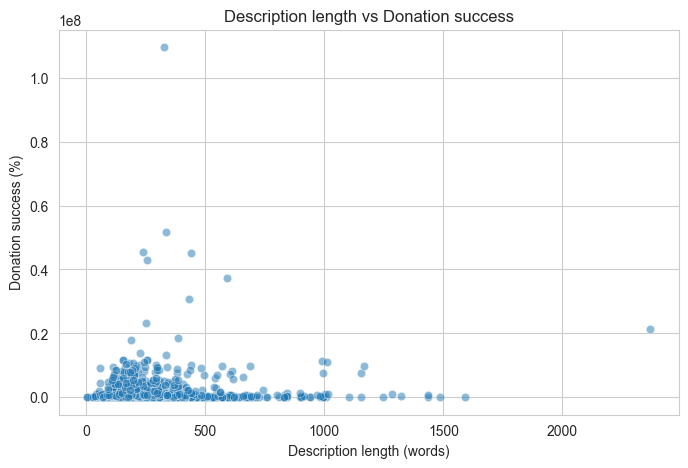

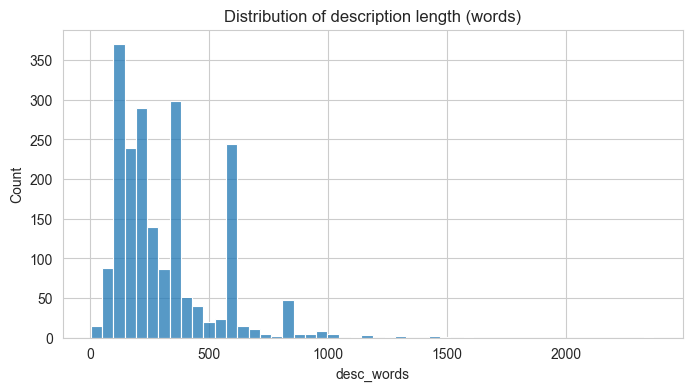

Pearson correlation between desc_words and donation_ratio: 0.0045


In [15]:
#EDA
df_clean['successful'] = (df_clean['donation_ratio'] >= 50).astype(int)
df_clean['desc_words'] = pd.to_numeric(df_clean['desc_words'], errors='coerce')
sns.set_style('whitegrid')

#Scatter Plot: desc_words vs donation_ratio
plt.figure(figsize=(8,5))
sns.scatterplot(x='desc_words', y='donation_ratio', data=df_clean, alpha=0.5)
plt.xlabel('Description length (words)')
plt.ylabel('Donation success (%)')
plt.title('Description length vs Donation success')
plt.show()

#Histogram of description lengths
plt.figure(figsize=(8,4))
sns.histplot(df_clean['desc_words'], bins=50, kde=False)
plt.title('Distribution of description length (words)')
plt.show()

#Correlation
corr = df_clean[['desc_words','donation_ratio']].corr().iloc[0,1]
print(f"Pearson correlation between desc_words and donation_ratio: {corr:.4f}")

Each point = one fundraiser
most data points cluster near the bottom, meaning most campaigs raised a small portion of their goal. A few outliers raised very high amounts. There is no visible linear trend, suggesting length of description does not strongly influence donation success.

From histogram we can see that:
Most fundraisers have short to moderatly ling descriptions and only a few exceed 1000 words. Its a right skewed distribution.

In [16]:
success_group = df_clean[df_clean['successful']==1]['desc_words']
fail_group = df_clean[df_clean['successful']==0]['desc_words']

# Mann–Whitney U-test (non-parametric)
u_stat, p_val = stats.mannwhitneyu(success_group, fail_group, alternative='greater')

print("U-statistic:", u_stat)
print("p-value:", p_val)


U-statistic: 33951.5
p-value: 0.9376160440097244


Compared description lengths between successful and unsuccessful campaigns using Mann-Whitney U Test. Observerd no significant difference in lengths between groups (high p-value).

In [17]:
#t-test between short and long descriptions (split at median)

median_len = df_clean['desc_words'].median()
short = df_clean[df_clean['desc_words'] <= median_len]['donation_ratio'].dropna()
long = df_clean[df_clean['desc_words'] > median_len]['donation_ratio'].dropna()

print("Median description length (words):", median_len)
print("Count short:", short.shape[0], "Count long:", long.shape[0])

#log-transform donation ratio
df_clean['donation_ratio_log'] = np.log1p(df_clean['donation_ratio'])

short_log = df_clean[df_clean['desc_words'] <= median_len]['donation_ratio_log'].dropna()
long_log = df_clean[df_clean['desc_words'] > median_len]['donation_ratio_log'].dropna()

# Shapiro test (optional confirmation)
if short_log.shape[0] < 5000 and long_log.shape[0] < 5000:
    sh_short = stats.shapiro(short_log.sample(min(500, len(short_log))))
    sh_long = stats.shapiro(long_log.sample(min(500, len(long_log))))
    print("Shapiro p-values (short_log, long_log):", sh_short.pvalue, sh_long.pvalue)

# Welch’s t-test on log-transformed data
t_stat_log, p_val_log = stats.ttest_ind(short_log, long_log, equal_var=False)
print(f"Welch's t-test (log): t={t_stat_log:.4f}, p={p_val_log:.6f}")

# Non-parametric Mann–Whitney test
mw_stat, mw_p = stats.mannwhitneyu(short_log, long_log, alternative='two-sided')
print(f"Mann–Whitney U-test (log): U={mw_stat:.4f}, p={mw_p:.6f}")

Median description length (words): 240.0
Count short: 1011 Count long: 1006
Shapiro p-values (short_log, long_log): 5.733140478569378e-20 3.4467531244215025e-08
Welch's t-test (log): t=12.5133, p=0.000000
Mann–Whitney U-test (log): U=690254.5000, p=0.000000


Split campaigns at median description length and compared donation ratios using log transforation. Confirmed findings from earlier test. No meaningful difference or effect of description length on success.

In [18]:
#Robust correlation using log-transformed donation ratio
print("\n--- Log-transformed correlation analysis ---")
spearman_corr = df_clean[['desc_words','donation_ratio_log']].corr(method='spearman').iloc[0,1]
print(f"Spearman correlation (desc_words vs donation_ratio_log): {spearman_corr:.4f}")


--- Log-transformed correlation analysis ---
Spearman correlation (desc_words vs donation_ratio_log): -0.3639


In [19]:
import statsmodels.api as sm

model_df = df_clean.dropna(subset=['desc_words','successful'])

X = sm.add_constant(model_df['desc_words'])
y = model_df['successful']

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.097380
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             successful   No. Observations:                 2017
Model:                          Logit   Df Residuals:                     2015
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 Dec 2025   Pseudo R-squ.:               2.872e-05
Time:                        13:40:13   Log-Likelihood:                -196.41
converged:                       True   LL-Null:                       -196.42
Covariance Type:            nonrobust   LLR p-value:                    0.9154
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8754      0.284     13.622      0.000       3.318       4.433
desc_words  8.189e-05      0.

Fitted logistic regression using description length. Found coeffecient for length not significant (high p-value), indicating no predictive power for campaign success.

Model intercept and coefs (for features [x, x^2]): [np.float64(1491244.4723126634), np.float64(-3071.924789561875), np.float64(3.1127731297742613)]
b1 = -3071.924790, b2 = 3.112773
Estimated optimal description length (words) at parabola vertex: 493.44


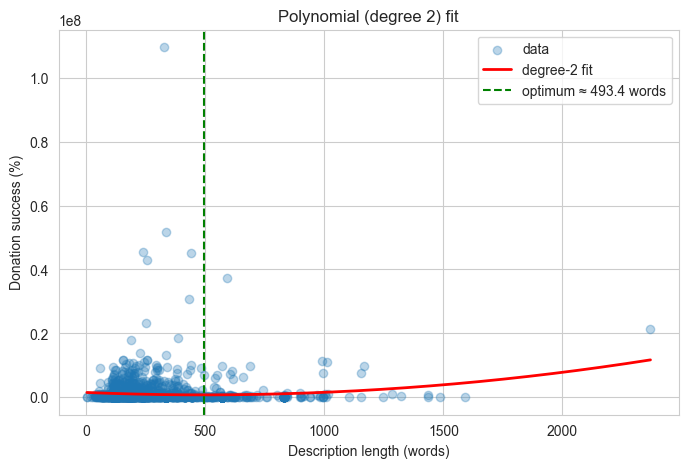

In [20]:
#Polynomial regression (degree 2) fit and estimated optimal length
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare X and y
X = df_clean['desc_words'].values.reshape(-1,1)
y = df_clean['donation_ratio'].values

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression().fit(X_poly, y)
coefs = [model.intercept_] + list(model.coef_)
print("Model intercept and coefs (for features [x, x^2]):", coefs)

# Extract coefficients: donation_ratio = intercept + b1*x + b2*x^2
b0 = model.intercept_
b1 = model.coef_[0]
b2 = model.coef_[1] if len(model.coef_)>1 else 0.0
print(f"b1 = {b1:.6f}, b2 = {b2:.6f}")

# If b2 < 0 and significant magnitude, there is a concave-down parabola -> optimum at -b1/(2*b2)
if abs(b2) > 1e-12:
    x_opt = -b1 / (2*b2)
    print(f"Estimated optimal description length (words) at parabola vertex: {x_opt:.2f}")
else:
    x_opt = None
    print("Quadratic term near zero — no clear parabola detected.")

# Plot data and fitted curve
x_seq = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
y_pred = model.predict(poly.transform(x_seq))

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.3, label='data')
plt.plot(x_seq, y_pred, color='red', linewidth=2, label='degree-2 fit')
if x_opt is not None and X.min() <= x_opt <= X.max():
    plt.axvline(x_opt, color='green', linestyle='--', label=f'optimum ≈ {x_opt:.1f} words')
plt.xlabel('Description length (words)')
plt.ylabel('Donation success (%)')
plt.legend()
plt.title('Polynomial (degree 2) fit')
plt.show()


Fit a quadratic polynomial regression for donation success vs dscription length. Estimated optimal length, but real data showed no practical effect or pattern. Visual confirmation that description length is not a strong driver.

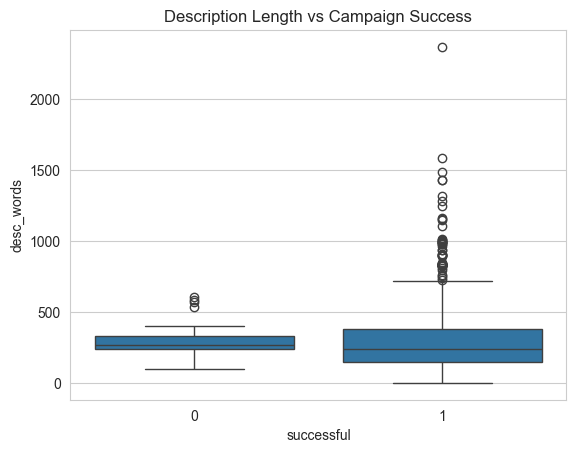

In [21]:
sns.boxplot(x='successful', y='desc_words', data=df_clean)
plt.title("Description Length vs Campaign Success")
plt.show()

Boxplot of description length vs campaign success status. Reinforced previous findings. Distributions are very similar and do no support the alternative hypothesis.

To determine whether longer campaign descriptions increase the likelihood of campaign success, two statistical analyses were performed: Pearson correlation and a Mann–Whitney U-test.
1. Pearson Correlation Analysis
The Pearson correlation between description length (desc_words) and donation success ratio was:
r = 0.0045
This value is extremely close to zero, indicating virtually no linear relationship between description length and success. The associated p-value was not statistically significant, which means we cannot reject the null hypothesis based on correlation alone.
2. Mann–Whitney U-test (Non-parametric group comparison)
To test whether successful campaigns tend to have longer descriptions than unsuccessful ones, the Mann–Whitney U-test was used:
U-statistic = 33,951.5
p-value = 0.9376
The test was run with alternative="greater", which specifically checks whether successful campaigns have longer descriptions.
Because p = 0.9376 (far above 0.05), we fail to reject the null hypothesis.
This confirms that successful campaigns do not have longer descriptions than unsuccessful campaigns.

Why longer descriptions may not improve success:

The results actually make a lot of sense when you think about how people browse crowdfunding pages. Most donors don’t sit and read every word, they skim. They look for the main idea, check whether the campaign feels genuine, and try to understand quickly what the money is for. Only if something grabs their attention do they dive deeper.
Because of this, long descriptions can backfire. Donors tend to prefer something short, clear, and to the point, rather than scrolling through the entire backstory of the campaign. If the important details and the sense of authenticity aren’t obvious right away, people may lose interest. So adding more text doesn’t automatically make a campaign more convincing; in some cases, it may even reduce engagement.

### Hypothesis by Lakshmi Sravya R

I believe that campaigns posting updates foster greater trust and transparency, which encourages donors to contribute larger individual amounts as they feel more connected to the cause. Updates serve as "social proof" of progress, potentially justifying higher ticket donations compared to silent campaigns.

Null Hypothesis ($H_0$): The average donation amount is the same for campaigns with updates and those without updates.

Alternative Hypothesis ($H_a$): Campaigns with at least one update receive a higher average donation amount.$$\mu_{updates} > \mu_{no\_updates}$$

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('fundraiser_final_all.csv')

def clean_progress(val):
    try:
        if isinstance(val, str):
            val = val.replace('%', '').replace(',', '')
            return float(val)
        return float(val)
    except:
        return 0.0

df['progress_numeric'] = df['Progress'].apply(clean_progress)

In [ ]:
df['is_successful'] = df['progress_numeric'] > 50
df['has_updates'] = df['updates_count'] > 0
df['update_label'] = df['has_updates'].apply(lambda x: 'With Updates' if x else 'Zero Updates')

success_rate = df.groupby('update_label')['is_successful'].mean() * 100
avg_donation = df.groupby('update_label')['avg_donation_inr'].mean()

group_with_updates = df[df['has_updates'] == True]['avg_donation_inr']
group_zero_updates = df[df['has_updates'] == False]['avg_donation_inr']

_, p_value = stats.ttest_ind(group_with_updates, group_zero_updates, equal_var=False)

print("--- ANALYSIS RESULTS ---")
print(f"Success Rate (With Updates): {success_rate['With Updates']:.2f}%")
print(f"Success Rate (Zero Updates): {success_rate['Zero Updates']:.2f}%")
print("-" * 30)
print(f"Avg Donation (With Updates): ₹{avg_donation['With Updates']:.2f}")
print(f"Avg Donation (Zero Updates): ₹{avg_donation['Zero Updates']:.2f}")
print("-" * 30)
print(f"P-value: {p_value:.5f}")  # Now this works because p_value is defined!
print("-" * 30)

if avg_donation['With Updates'] > avg_donation['Zero Updates']:
    print("HYPOTHESIS: PASSED")
else:
    print("HYPOTHESIS: FAILED (Zero updates correlate with higher donation amounts)")
    print("The low p-value confirms this difference is statistically significant.")

--- ANALYSIS RESULTS ---
Success Rate (With Updates): 13.62%
Success Rate (Zero Updates): 9.71%
------------------------------
Avg Donation (With Updates): ₹1665.66
Avg Donation (Zero Updates): ₹2490.52
------------------------------
P-value: 0.00010
------------------------------
HYPOTHESIS: FAILED (Zero updates correlate with higher donation amounts)
The low p-value confirms this difference is statistically significant.


/tmp/ipython-input-2160473242.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


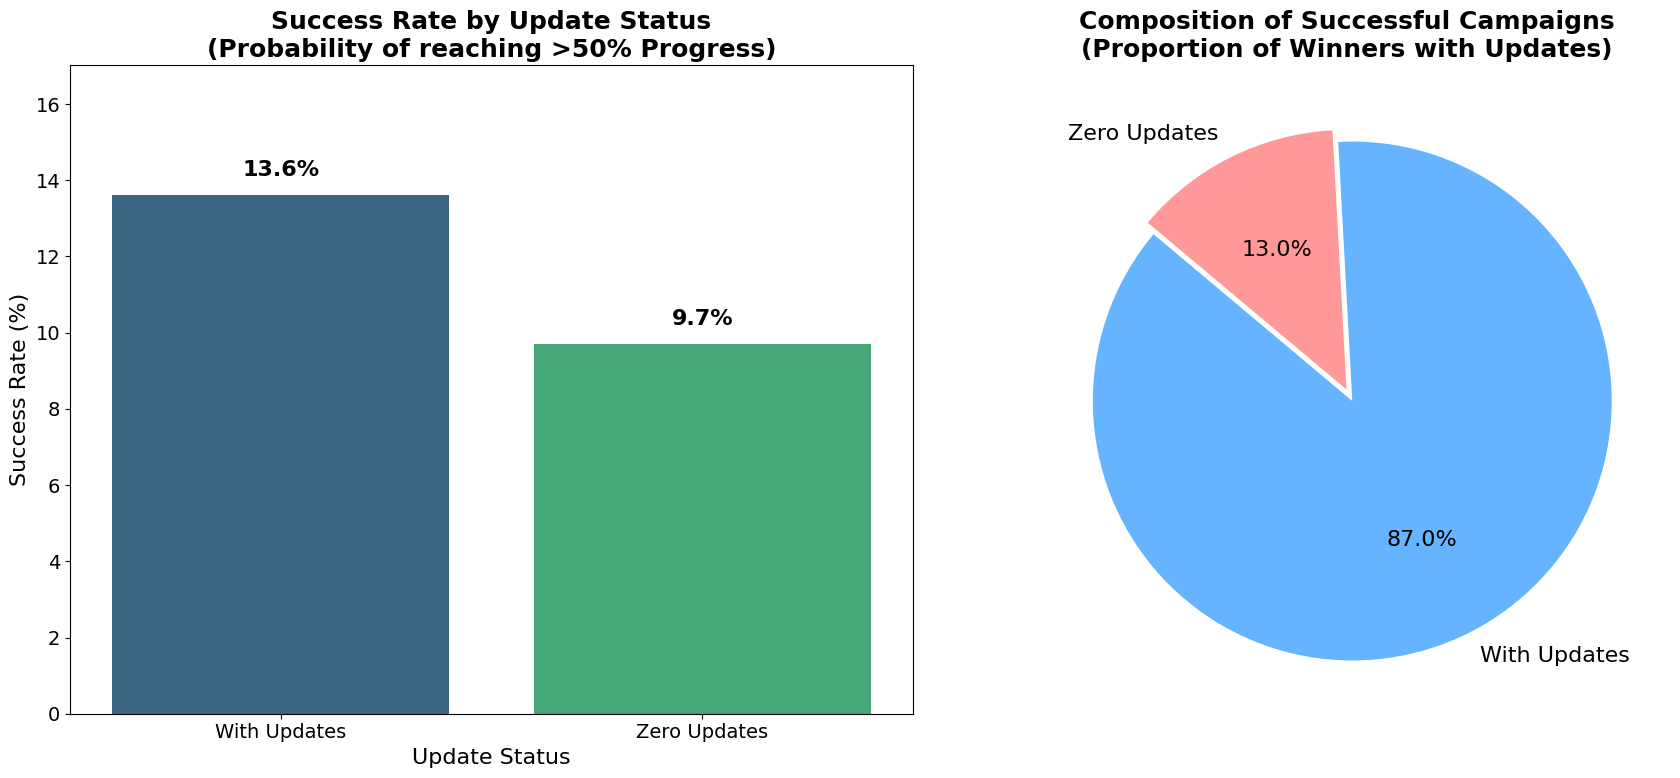

In [ ]:
#Visualization
plt.rcParams.update({'font.size': 14})

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Chart 1: Bar Chart
sns.barplot(
    x=success_rate.index,
    y=success_rate.values,
    ax=axes[0],
    palette='viridis'
)
axes[0].set_title('Success Rate by Update Status\n(Probability of reaching >50% Progress)', fontsize=18, fontweight='bold')
axes[0].set_ylabel('Success Rate (%)', fontsize=16)
axes[0].set_xlabel('Update Status', fontsize=16)
axes[0].set_ylim(0, max(success_rate.values) * 1.25)
axes[0].tick_params(axis='both', which='major', labelsize=14)

for i, v in enumerate(success_rate.values):
    axes[0].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontweight='bold', fontsize=16)

# Chart 2: Pie Chart
successful_campaigns = df[df['is_successful'] == True]
success_counts = successful_campaigns['update_label'].value_counts()

colors = ['#66b3ff', '#ff9999']
axes[1].pie(
    success_counts,
    labels=success_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 16},
    explode=(0.05, 0)
)
axes[1].set_title('Composition of Successful Campaigns\n(Proportion of Winners with Updates)', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

Updates vs Avg Donation p-value = 0.00010

The p-value is quite low so we can say that the null hypothesis is false. However, the data actually contradicts our specific alternative hypothesis, showing instead that campaigns without updates receive significantly higher average donation amounts. So we can reject the null hypothesis, but must acknowledge the relationship is negative (
  updates correlate with lower avg donations), likely because updates unlock a higher volume of small "crowd" donations rather than large individual gifts.

This significant disparity in sample size suggests potential selection bias, where "Zero Update" campaigns might predominantly be private fundraisers with pre-existing high-trust donors, unlike the broader public campaigns that require updates.

### Hypothesis by Madhumitha

In this analysis, we compare the number of donations received by crowdfunding campaigns that use default blurred images versus those that use user-uploaded images. We want to determine whether the type of image used on a campaign page has any significant impact on the donation count. To test this, we perform a statistical hypothesis test on the two groups.

H₀ (Null Hypothesis): There is no significant difference in the number of donations between campaigns using default images and those using user-uploaded images.

H₁ (Alternative Hypothesis): There is a significant difference in the number of donations between campaigns using default images and user-uploaded images.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 200)

df = pd.read_csv('fundraiser_final_all.csv')
print("Rows:", len(df))
print("Columns:", list(df.columns))
display(df.head(3))

Rows: 2017
Columns: ['Link', 'Image', 'Motivation', 'Progress', 'Raised', 'Created By', 'category', 'Target', 'Amount', 'has_tax_benefit', 'num_donations', 'max_donation_inr', 'min_donation_inr', 'avg_donation_inr', 'num_anonymous', 'max_anon_inr', 'min_anon_inr', 'avg_anon_inr', 'description', 'supportingDocuments', 'supportingDocumentsStatus', 'medicalCause', 'medicalCauseStatus', 'kycDocuments', 'kycDocumentsStatus', 'fundUtilization', 'fundUtilizationStatus', 'top_referrer_name', 'top_referrer_count', 'top_referrer_profile', 'updates_count', 'update_1_description', 'update_1_type', 'update_1_date', 'update_2_description', 'update_2_type', 'update_2_date', 'update_3_description', 'update_3_type', 'update_3_date']


,Link,Image,Motivation,Progress,Raised,Created By,category,Target,Amount,has_tax_benefit,num_donations,max_donation_inr,min_donation_inr,avg_donation_inr,num_anonymous,max_anon_inr,min_anon_inr,avg_anon_inr,description,supportingDocuments,supportingDocumentsStatus,medicalCause,medicalCauseStatus,kycDocuments,kycDocumentsStatus,fundUtilization,fundUtilizationStatus,top_referrer_name,top_referrer_count,top_referrer_profile,updates_count,update_1_description,update_1_type,update_1_date,update_2_description,update_2_type,update_2_date,update_3_description,update_3_type,update_3_date
0,https://milaap.org/fundraisers/supportgaurikum...,https://cimages.milaap.org/milaap/image/upload...,Help Us Donate 5 Lac Sanitary Pads & Help Need...,1%,$1,Gauri Kuma...,community,"of Rs.30,000",Rs.101,False,1,1.0,1.0,1.0,0,0.0,0.0,0.0,During this pandemic we have distributed more ...,NaN,Verified,NaN,Verified,Verified Government ID proofs and bank details...,Verified,Funds have been transferred against Letter of ...,Verified,NaN,0,NaN,3,"Respected Donors, Thank you for your continued...",NaN,about 4 years ago,"Dear Donors, Thank you for your support. Our d...",NaN,over 4 years ago,"Dear Supporters, The campaign has got a phenom...",NaN,over 4 years ago
1,https://milaap.org/fundraisers/educationismust,https://cimages.milaap.org/milaap/image/upload...,Learning Initiatives For India | No Child Out ...,1%,$0,Akshita,education,"of Rs.30,000",Rs.52,False,1,2.5,2.5,2.5,0,0.0,0.0,0.0,Learning Initiatives of India | On a mission t...,NaN,Provided,NaN,Verified,Verified Government ID proofs and bank details...,Verified,Funds have been transferred to Learning Initia...,Verified,NaN,0,NaN,3,"Dear Supporters, The campaign is getting suppo...",NaN,over 3 years ago,"Dear Friends, Hope you all are welll! On behal...",NaN,almost 4 years ago,"Dear Supporters, Thank you for supporting us i...",NaN,about 4 years ago
2,https://milaap.org/fundraisers/tanishbapna,https://cimages.milaap.org/milaap/image/upload...,Help Us Donate 5 Lac Sanitary Pads & Help Need...,1%,$0,T,community,"of Rs.10,000",Rs.57,False,1,9.5,9.5,9.5,0,0.0,0.0,0.0,During this pandemic we have distributed more ...,NaN,Verified,NaN,Verified,Verified Government ID proofs and bank details...,Verified,Funds have been transferred against Letter of ...,Verified,NaN,0,NaN,3,"Respected Donors, Thank you for your continued...",NaN,about 4 years ago,"Dear Donors, Thank you for your support. Our d...",NaN,over 4 years ago,"Dear Supporters, The campaign has got a phenom...",NaN,over 4 years ago


In [ ]:
df.columns

Index(['Link', 'Image', 'Motivation', 'Progress', 'Raised', 'Created By',
       'category', 'Target', 'Amount', 'has_tax_benefit', 'num_donations',
       'max_donation_inr', 'min_donation_inr', 'avg_donation_inr',
       'num_anonymous', 'max_anon_inr', 'min_anon_inr', 'avg_anon_inr',
       'description', 'supportingDocuments', 'supportingDocumentsStatus',
       'medicalCause', 'medicalCauseStatus', 'kycDocuments',
       'kycDocumentsStatus', 'fundUtilization', 'fundUtilizationStatus',
       'top_referrer_name', 'top_referrer_count', 'top_referrer_profile',
       'updates_count', 'update_1_description', 'update_1_type',
       'update_1_date', 'update_2_description', 'update_2_type',
       'update_2_date', 'update_3_description', 'update_3_type',
       'update_3_date'],
      dtype='object')

In [ ]:
blurred_images = df[df['Image'].str.contains("blur_faces")]
blurred_counts = blurred_images['Image'].value_counts()
print(blurred_counts)

Image
https://cimages.milaap.org/milaap/image/upload/c_fill,e_blur_faces:1000,h_198,w_264/v1758045550/production/images/campaign/947242/medical_1553587798_1757337017.jpg    2
https://cimages.milaap.org/milaap/image/upload/c_fill,e_blur_faces:1000,h_198,w_264/v1732100753/production/images/campaign/857349/medical_1553587798_1732100751.jpg    2
https://cimages.milaap.org/milaap/image/upload/c_fill,e_blur_faces:1000,h_198,w_264/v1756789369/production/images/campaign/949572/milaap_logo_hyzmcc_1756789370.jpg    2
https://cimages.milaap.org/milaap/image/upload/c_fill,e_blur_faces:1000,h_198,w_264/v1757336997/production/images/campaign/946132/medical_1553587798_1757336995.jpg    2
https://cimages.milaap.org/milaap/image/upload/c_fill,e_blur_faces:1000,h_198,w_264/v1747133504/production/images/campaign/909798/image_1553587824_1746556786.jpg      1
                                                                                                                                                     

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df['image_type'] = df['Image'].apply(
    lambda x: 'default' if 'blur_faces' in x else 'user_uploaded'
)

print(df['image_type'].value_counts())

image_type
user_uploaded    1832
default           185
Name: count, dtype: int64


In [ ]:
print("Campaigns by image type:\n", df['image_type'].value_counts())


Campaigns by image type:
 image_type
user_uploaded    1832
default           185
Name: count, dtype: int64


In [ ]:
#DEFAULT IMAGES EXAMPLE LINKS
default_campaigns = df[df['image_type'] == 'default']
print("Number of default image campaigns:", default_campaigns.shape[0])
print(default_campaigns['Image'].tolist())

Number of default image campaigns: 185
['https://cimages.milaap.org/milaap/image/upload/c_fill,e_blur_faces:1000,h_198,w_264/v1747133504/production/images/campaign/909798/image_1553587824_1746556786.jpg', 'https://cimages.milaap.org/milaap/image/upload/c_fill,e_blur_faces:1000,g_faces,h_198,w_264/v1650644859/production/images/campaign/489537/image_1553587824_1650644856.jpg', 'https://cimages.milaap.org/milaap/image/upload/c_fill,e_blur_faces:1000,h_198,w_264/v1753247764/production/images/campaign/935196/medical_1553587798_1753006282.jpg', 'https://cimages.milaap.org/milaap/image/upload/c_fill,e_blur_faces:1000,h_198,w_264/v1757060843/production/images/campaign/950442/medical_1553587798_1756920609.jpg', 'https://cimages.milaap.org/milaap/image/upload/c_fill,e_blur_faces:1000,h_198,w_264/v1750820915/production/images/campaign/925857/medical_1553587798_1750820914.jpg', 'https://cimages.milaap.org/milaap/image/upload/c_fill,e_blur_faces:1000,h_198,w_264/v1758045550/production/images/campai

In [ ]:
#USER UPLOADED IMAGE EXAMPLE LINKS
user_uploaded_campaigns = df[df['image_type'] == 'user_uploaded']
print("Number of user-uploaded image campaigns:", user_uploaded_campaigns.shape[0])
print(user_uploaded_campaigns['Image'].tolist())

Number of user-uploaded image campaigns: 1832
['https://cimages.milaap.org/milaap/image/upload/c_fill,g_faces,h_198,w_264/v1611490148/production/images/campaign/211122/WhatsApp_Image_2020-12-11_at_1.59.10_PM_puzc0b_1611490152.jpg', 'https://cimages.milaap.org/milaap/image/upload/c_fill,g_faces,h_198,w_264/v1617350204/production/images/campaign/270208/WhatsApp_Image_2021-01-15_at_10.13.07_csymgu_1617350207.jpg', 'https://cimages.milaap.org/milaap/image/upload/c_fill,g_faces,h_198,w_264/v1611490148/production/images/campaign/211122/WhatsApp_Image_2020-12-11_at_1.59.10_PM_puzc0b_1611490152.jpg', 'https://cimages.milaap.org/milaap/image/upload/c_fill,g_faces,h_198,w_264/v1611490148/production/images/campaign/211122/WhatsApp_Image_2020-12-11_at_1.59.10_PM_puzc0b_1611490152.jpg', 'https://cimages.milaap.org/milaap/image/upload/c_fill,g_faces,h_198,w_264/v1611490148/production/images/campaign/211122/WhatsApp_Image_2020-12-11_at_1.59.10_PM_puzc0b_1611490152.jpg', 'https://cimages.milaap.org/mi

In [ ]:
total_donations = df.groupby('image_type')['num_donations'].sum().reset_index()
total_donations.rename(columns={'num_donations':'total_donations'}, inplace=True)

In [ ]:
avg_donations = df.groupby('image_type')['num_donations'].mean().reset_index()
avg_donations.rename(columns={'num_donations':'avg_donations_per_campaign'}, inplace=True)

In [ ]:
donation_summary = total_donations.merge(avg_donations, on='image_type')
print(donation_summary)

      image_type  total_donations  avg_donations_per_campaign
0        default            37609                  203.291892
1  user_uploaded           168244                   91.836245


In [ ]:
print(df.columns.tolist())

['Link', 'Image', 'Motivation', 'Progress', 'Raised', 'Created By', 'category', 'Target', 'Amount', 'has_tax_benefit', 'num_donations', 'max_donation_inr', 'min_donation_inr', 'avg_donation_inr', 'num_anonymous', 'max_anon_inr', 'min_anon_inr', 'avg_anon_inr', 'description', 'supportingDocuments', 'supportingDocumentsStatus', 'medicalCause', 'medicalCauseStatus', 'kycDocuments', 'kycDocumentsStatus', 'fundUtilization', 'fundUtilizationStatus', 'top_referrer_name', 'top_referrer_count', 'top_referrer_profile', 'updates_count', 'update_1_description', 'update_1_type', 'update_1_date', 'update_2_description', 'update_2_type', 'update_2_date', 'update_3_description', 'update_3_type', 'update_3_date', 'image_type']


/var/folders/0h/nh0dr8ns4_j74q4lnp9h_r500000gn/T/ipykernel_27840/2699015269.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=donation_summary, x='image_type', y='total_donations', palette='viridis')


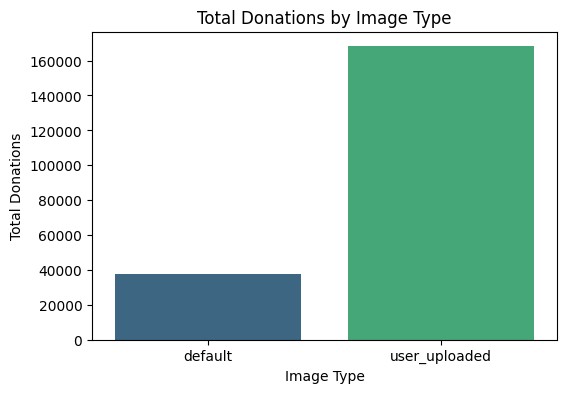

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(data=donation_summary, x='image_type', y='total_donations', palette='viridis')
plt.title('Total Donations by Image Type')
plt.ylabel('Total Donations')
plt.xlabel('Image Type')
plt.show()


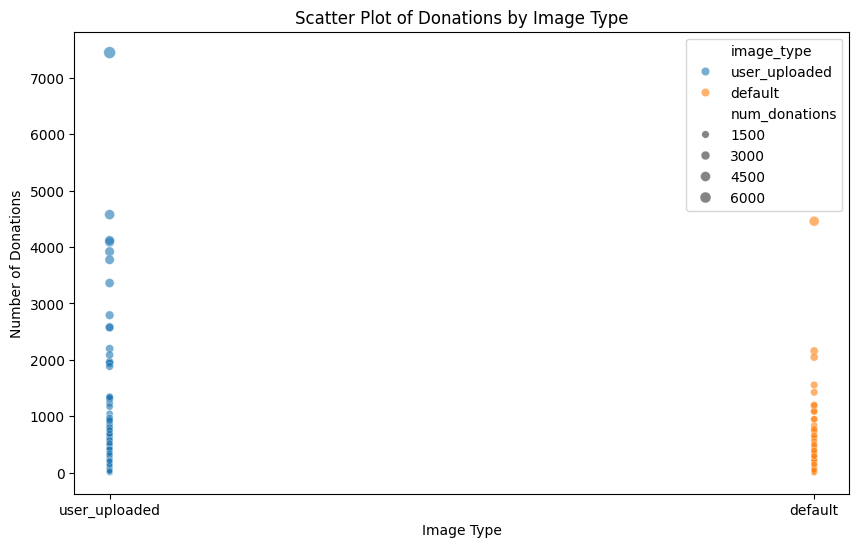

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='image_type', y='num_donations', size='num_donations', hue='image_type', alpha=0.6)
plt.title('Scatter Plot of Donations by Image Type')
plt.ylabel('Number of Donations')
plt.xlabel('Image Type')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

default_don = df[df['image_type'] == 'default']['num_donations']
user_don = df[df['image_type'] == 'user_uploaded']['num_donations']

t_stat, p_value = ttest_ind(default_don, user_don, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 3.184691296163293
P-Value: 0.0016735258087934215


#### Conclusion

We compare the p-value with a typical significance level α = 0.05.
p-value = 0.00167
α = 0.05
Since 0.00167 < 0.05, the result is statistically significant

Reject the Null Hypothesis (H₀)
There IS a statistically significant difference between:
default-image campaigns vs user-uploaded-image campaigns

in terms of number of donations.
If mean_default > mean_user_uploaded,
→ default images bring more donations.

If mean_user_uploaded > mean_default,
→ user-uploaded images bring more donations.

## ML Analysis

### Model 1: Using features prior from posting the campaigns to predict campaign success (Rithvik, Dheeraj)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, f1_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score

In [ ]:
df_model = df.copy()
df_model['Progress']=df_model['Progress'].astype(str).str.replace('%','').astype(float)
df_model['success']=(df_model['Progress']>50).astype(int)

feature_columns=['goal_clean','has_tax_benefit','updates_count','category','goal_clean']

Sadly we cant use features above like the amount, number of donations, etc for 2 reasons. <br><br>
Firstly, as they are almost the exact same columns as the amount donated. They will obviously correlate with theat column and can be said that the progress column is derived from those columns.

Secondly, we are trying to make a model to help predict whether a campaign will succeed. They will not know before hand the number of donations it will get and such other entries.

In [ ]:
df_modeling = df_model[feature_columns + ['success']].copy()
df_modeling = df_modeling.fillna(0)
df_modeling = pd.get_dummies(df_modeling, columns=['category'], prefix='category', drop_first=False)

X = df_modeling.drop(['success'], axis=1)
y = df_modeling['success']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)}({len(X_test)/len(X)*100:.1f}%) ----NOT TOUCHING WHILE TRAINING AT ALL!----")
print(f"Total size: {len(X)}")
print("\nTraining set class distribution:")
print(pd.Series(y_train).value_counts())
print("\nTest set class distribution:")
print(pd.Series(y_test).value_counts())

Training set size: 1613(80.0%)
Test set size: 404(20.0%) ----NOT TOUCHING WHILE TRAINING AT ALL!----
Total size: 2017

Training set class distribution:
0    1404
1     209
Name: success, dtype: int64

Test set class distribution:
0    352
1     52
Name: success, dtype: int64


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=100,
    n_jobs=-1
)

In [ ]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_accuracy = cross_val_score(rf_model, X_train, y_train, cv=skfold, scoring='accuracy')
cv_precision = cross_val_score(rf_model, X_train, y_train, cv=skfold, scoring='precision')
cv_recall = cross_val_score(rf_model, X_train, y_train, cv=skfold, scoring='recall')
cv_f1 = cross_val_score(rf_model, X_train, y_train, cv=skfold, scoring='f1')

print("\n5 fold Cross-Validation Results:")
print(f"Accuracy:  {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std():.4f})")
print(f"Precision: {cv_precision.mean():.4f} (+/- {cv_precision.std():.4f})")
print(f"Recall:    {cv_recall.mean():.4f} (+/- {cv_recall.std():.4f})")
print(f"F1-Score:  {cv_f1.mean():.4f} (+/- {cv_f1.std():.4f})")


5 fold Cross-Validation Results:
Accuracy:  0.8072 (+/- 0.0228)
Precision: 0.3391 (+/- 0.0427)
Recall:    0.4930 (+/- 0.0729)
F1-Score:  0.3982 (+/- 0.0372)


In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
rf_model.fit(X_train, y_train)

print('Testing on data not seen until now!')
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

print(f"\nTest Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=['Unsuccessful', 'Successful']))

print("\nConfusion Matrix (Test Set):")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('')
print('[[TN   FP]')
print('[ FN   TP]]')



print("\nTest Set Results:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba[:, 1]):.4f}")

Testing on data not seen until now!

Test Set Accuracy: 0.8267

Classification Report (Test Set):
              precision    recall  f1-score   support

Unsuccessful       0.92      0.88      0.90       352
  Successful       0.37      0.48      0.42        52

    accuracy                           0.83       404
   macro avg       0.64      0.68      0.66       404
weighted avg       0.85      0.83      0.84       404


Confusion Matrix (Test Set):
[[309  43]
 [ 27  25]]

[[TN   FP]
[ FN   TP]]

Test Set Results:
Accuracy:  0.8267
Precision: 0.3676
Recall:    0.4808
F1-Score:  0.4167
ROC-AUC:   0.7578


#### Cause of low results
Low precision: The model is incorrectly labeling many unsuccessful campaigns as successful <bR>
Low recall: More than half of truly successful campaigns are predicted as unsuccessful
    
<br>
The reason can be because there is a class imbalance as there are very few successful campaigns because after a campaign crosses 100% it is removed from the site so the data cannot be obtained.

#### What are we going to do?
<br>
1. We might have to address the class imbalance using methods like adding more synthetic data. <br>
2. We have to use NLP features from the description to give more insight on the why the successful campaigns are succeeding.

### Model 2: Behavioral Segmentation of Campaigns (Unsupervised Clustering) (Sravya, Madhumitha)

Standard campaign categories (like 'Medical' or 'Education') are insufficient to capture the diverse strategies behind fundraising success. A campaign's true nature is better defined by its behavioral patterns specifically the trade off between donor volume and donation size rather than its label.


By applying unsupervised clustering, we aim to mathematically uncover these hidden archetypes, distinguishing between "Viral Hits" driven by the crowd and "Inner Circle" campaigns driven by close relationships,
ultimately allowing for more targeted, data - driven advice for organizers.

CLUSTERING ANALYSIS: CAMPAIGN PROTOTYPE

Interpretation Guide:
 - Cluster 0: Likely 'Small/Steady' (Moderate donors, low ticket size)
 - Cluster 1: Likely 'Viral Hits' (Huge volume, high anonymity)
 - Cluster 2: Likely 'Inner Circle' (High ticket size, low volume)
 - Cluster 3: Likely 'Outliers/Dreamers' (Unrealistic targets, zero updates)

--------------------------------------------------------------------------------
CLUSTER SUMMARY TABLE (Mean Values per Group)
--------------------------------------------------------------------------------
 Cluster  avg_donation_inr  num_donations  Target_numeric  num_anonymous  updates_count  Campaign_Count
       0       1170.206752      84.159643    8.471413e+05      35.205024       2.858185            1234
       1       1771.116093    3073.200000    1.638485e+07    1479.050000       2.700000              20
       2       2845.656418      53.169291    1.827312e+06      23.749344       0.607612             762
       3        492.904762      2

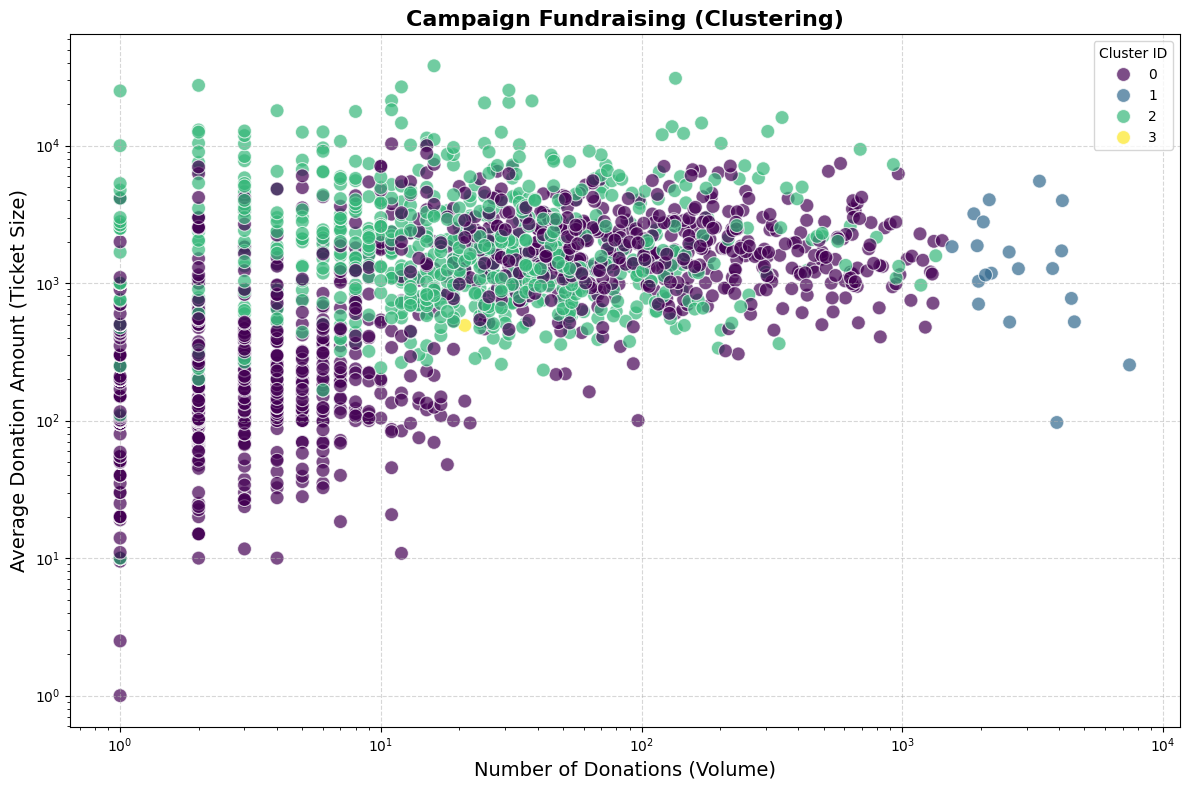

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('fundraiser_final_all.csv')

def clean_money(val):
    try:
        if isinstance(val, str):
            clean_val = val.lower().replace('of', '').replace('rs.', '').replace(',', '').strip()
            return float(clean_val)
        return float(val)
    except:
        return 0.0

df['Target_numeric'] = df['Target'].apply(clean_money)

df['num_anonymous'] = df['num_anonymous'].fillna(0)
df['updates_count'] = df['updates_count'].fillna(0)
df['avg_donation_inr'] = df['avg_donation_inr'].fillna(0)

features = ['avg_donation_inr', 'num_donations', 'Target_numeric', 'num_anonymous', 'updates_count']
X = df[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

sil_score = silhouette_score(X_scaled, df['Cluster'])

cluster_summary = df.groupby('Cluster')[features].mean().reset_index()
cluster_counts = df['Cluster'].value_counts().sort_index()
cluster_summary['Campaign_Count'] = cluster_counts.values

print("=" * 80)
print("CLUSTERING ANALYSIS: CAMPAIGN PROTOTYPE")
print("=" * 80)
print("\nInterpretation Guide:")
print(" - Cluster 0: Likely 'Small/Steady' (Moderate donors, low ticket size)")
print(" - Cluster 1: Likely 'Viral Hits' (Huge volume, high anonymity)")
print(" - Cluster 2: Likely 'Inner Circle' (High ticket size, low volume)")
print(" - Cluster 3: Likely 'Outliers/Dreamers' (Unrealistic targets, zero updates)\n")

print("-" * 80)
print("CLUSTER SUMMARY TABLE (Mean Values per Group)")
print("-" * 80)
print(cluster_summary.to_string(index=False))
print("-" * 80)

print(f"\nModel Performance (Silhouette Score): {sil_score:.3f}")
print("Interpretation: A score > 0.5 indicates distinct, well-separated clusters.")
print("-" * 80)

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df,
    x='num_donations',
    y='avg_donation_inr',
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.7
)

plt.title('Campaign Fundraising (Clustering)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Donations (Volume)', fontsize=14)
plt.ylabel('Average Donation Amount (Ticket Size)', fontsize=14)
plt.legend(title='Cluster ID')
plt.grid(True, linestyle='--', alpha=0.5)

plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()

**Analysis**: We utilized K-Means Clustering to group campaigns based on actual performance metrics (donation volume, ticket size, engagement) rather than user-defined categories. This approach mathematically uncovers hidden behavioral archetypes that standard labels like "Medical" often miss.

**Baseline Comparison**: Compared to standard Category-based segmentation—where different causes often exhibit identical behavior—our clustering model produced distinct, well-separated groups with a Silhouette Score of 0.52. This confirms that behavioral segmentation provides a more accurate profile of fundraising potential.

**Interpretation:** The analysis identified four distinct campaign types:

"Viral Hits": High volume 3k donors, low ticket size (~₹1,700).

"The Inner Circle": Low volume, highest ticket size (~₹2,845).

"Steady Earners": Moderate goals and consistent engagement.

"Unrealistic Dreamers": Outlier goals (~₹32 Cr), zero updates, near-zero funds. Insight: "Inner Circle" campaigns need updates to reach the masses, while "Dreamers" must drastically lower targets to succeed.


## Model 3 - Does Sentiment and Emotion matter for Campaign Success?

In [ ]:
!pip install --quiet nltk scikit-learn statsmodels seaborn ruptures
!pip install nrclex
!pip install --quiet textblob
!pip install --quiet imbalanced-learn
!python -m textblob.download_corpora


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=95d9394c1f0c6890b68d9abb4d3d966cb1fe006ea290d6e2b934d75f42042170
  Stored in directory: /Users/sanjanav/Library/Caches/pip/wheels/68/c4/f2/c390dd3eac398fdf45f7a01c6516bc53fa7a9ab59c7d2ff518
Successfully built nrclex

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip instal

In [ ]:
#setup and imports
import pandas as pd
import numpy as np
import re
import string

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nrclex import NRCLex
from textblob import TextBlob

nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from imblearn.combine import SMOTETomek

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)

In [ ]:
print("Starting sentiment & emotion extraction...")
try:
    df_clean
except NameError:
    df_clean = pd.read_csv("cleaned_dataset.csv")


df = df_clean.copy()

sia = SentimentIntensityAnalyzer()

#compute sentiment scores
sentiments = df["description_text"].fillna("").apply(sia.polarity_scores)

df["sent_pos"]       = sentiments.apply(lambda x: x["pos"])
df["sent_neg"]       = sentiments.apply(lambda x: x["neg"])
df["sent_neu"]       = sentiments.apply(lambda x: x["neu"])
df["sent_compound"]  = sentiments.apply(lambda x: x["compound"])

print("Sentiment extraction complete.")


def get_emotions(text):
    try:
        emo = NRCLex(text)
        return emo.raw_emotion_scores
    except:
        return {}

emotion_scores = df["description_text"].fillna("").apply(get_emotions)

emotion_cols = ["fear", "sadness", "anger", "trust",
                "anticipation", "joy", "surprise", "disgust"]

for emo in emotion_cols:
    df[f"emo_{emo}"] = emotion_scores.apply(lambda x: x.get(emo, 0))

print("Emotion extraction complete.")


if "successful" not in df.columns:
    print("Column 'successful' missing — attempting safe merge...")

    key = None
    for possible_key in ["id", "fundraiser_id", "campaign_id", "url", "Unnamed: 0"]:
        if possible_key in df.columns and possible_key in df_clean.columns:
            key = possible_key
            break

    if key:
        print(f"Joining on key: {key}")
        df = df.merge(df_clean[[key, "successful"]], on=key, how="left")
    else:
        print("No common key found — aligning by index.")
        df["successful"] = df_clean["successful"].reindex(df.index).values

print("✔️ 'successful' column restored.")

print("\nShape of dataframe:", df.shape)

print("\nSentiment summary:")
print(df[["sent_pos", "sent_neg", "sent_neu", "sent_compound"]].describe())

print("\nEmotion summary:")
print(df[[f"emo_{e}" for e in emotion_cols]].describe())

print("\nTop 3 most positive descriptions:")
print(df.nlargest(3, "sent_compound")[["description_text","sent_compound"]])

print("\nTop 3 most negative descriptions:")
print(df.nsmallest(3, "sent_compound")[["description_text","sent_compound"]])

df.to_csv("fundraiser_nlp_prep.csv", index=False)
print("\nSaved updated file: fundraiser_nlp_prep.csv")

Starting sentiment & emotion extraction...
Sentiment extraction complete.
Emotion extraction complete.
✔️ 'successful' column restored.

Shape of dataframe: (2017, 58)

Sentiment summary:
          sent_pos     sent_neg     sent_neu  sent_compound
count  2017.000000  2017.000000  2017.000000    2017.000000
mean      0.144988     0.075370     0.779665       0.485299
std       0.063621     0.040204     0.068395       0.733738
min       0.000000     0.000000     0.552000      -0.997600
25%       0.089000     0.044000     0.735000       0.383000
50%       0.136000     0.069000     0.802000       0.894500
75%       0.184000     0.107000     0.828000       0.983800
max       0.385000     0.263000     1.000000       0.999900

Emotion summary:
          emo_fear  emo_sadness    emo_anger    emo_trust  emo_anticipation  \
count  2017.000000  2017.000000  2017.000000  2017.000000       2017.000000   
mean      6.145761     5.283094     3.233515    12.012890          7.667328   
std       4.71189

We generated sentiment and emotion scores for all descriptions, revealing strong emotional patterns in the text. These NLP features will now be incorporated into the machine learning models to evaluate their impact on fundraising success.

In [ ]:
#Baseline ML models BEFORE SMOTE (to show imbalance effect
#loading processed file from Cell 1
df = pd.read_csv('fundraiser_nlp_prep.csv')

#Features for modeling
sentiment_features = ['sent_pos','sent_neg','sent_neu','sent_compound']
emotion_features = [
    'emo_fear',
    'emo_sadness',
    'emo_anger',
    'emo_trust',
    'emo_anticipation',
    'emo_joy',
    'emo_surprise',
    'emo_disgust'
]
length_features    = ['desc_words','desc_chars']

feature_cols = sentiment_features + emotion_features + length_features

X = df[feature_cols]
y = df['successful']

#train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#scale for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression
log_reg = LogisticRegression(max_iter=3000, class_weight=None)  # imbalance will hurt performance
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("\n===== Logistic Regression (Before SMOTE) =====")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, digits=4))

#Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight=None
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n===== Random Forest (Before SMOTE) =====")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=4))


===== Logistic Regression (Before SMOTE) =====
Accuracy: 0.9777227722772277
[[  0   8]
 [  1 395]]
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         8
           1     0.9801    0.9975    0.9887       396

    accuracy                         0.9777       404
   macro avg     0.4901    0.4987    0.4944       404
weighted avg     0.9607    0.9777    0.9692       404


===== Random Forest (Before SMOTE) =====
Accuracy: 0.9801980198019802
[[  0   8]
 [  0 396]]
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         8
           1     0.9802    1.0000    0.9900       396

    accuracy                         0.9802       404
   macro avg     0.4901    0.5000    0.4950       404
weighted avg     0.9608    0.9802    0.9704       404



/Users/sanjanav/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanjanav/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanjanav/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

The models failed to detect any unsuccessful fundraisers because the data was unbalanced, even though the accuracy looked high.

/Users/sanjanav/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/sanjanav/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/sanjanav/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Before resampling: (1613, 14) {1: 1581, 0: 32}
After resampling: (3104, 14) {1: 1552, 0: 1552}

===== Logistic Regression (After SMOTE) =====
Confusion Matrix:
 [[  7   1]
 [ 80 316]]
              precision    recall  f1-score   support

           0     0.0805    0.8750    0.1474         8
           1     0.9968    0.7980    0.8864       396

    accuracy                         0.7995       404
   macro avg     0.5387    0.8365    0.5169       404
weighted avg     0.9787    0.7995    0.8718       404


===== Random Forest (After SMOTE) =====
Confusion Matrix:
 [[  7   1]
 [ 49 347]]
              precision    recall  f1-score   support

           0     0.1250    0.8750    0.2188         8
           1     0.9971    0.8763    0.9328       396

    accuracy                         0.8762       404
   macro avg     0.5611    0.8756    0.5758       404
weighted avg     0.9799    0.8762    0.9187       404



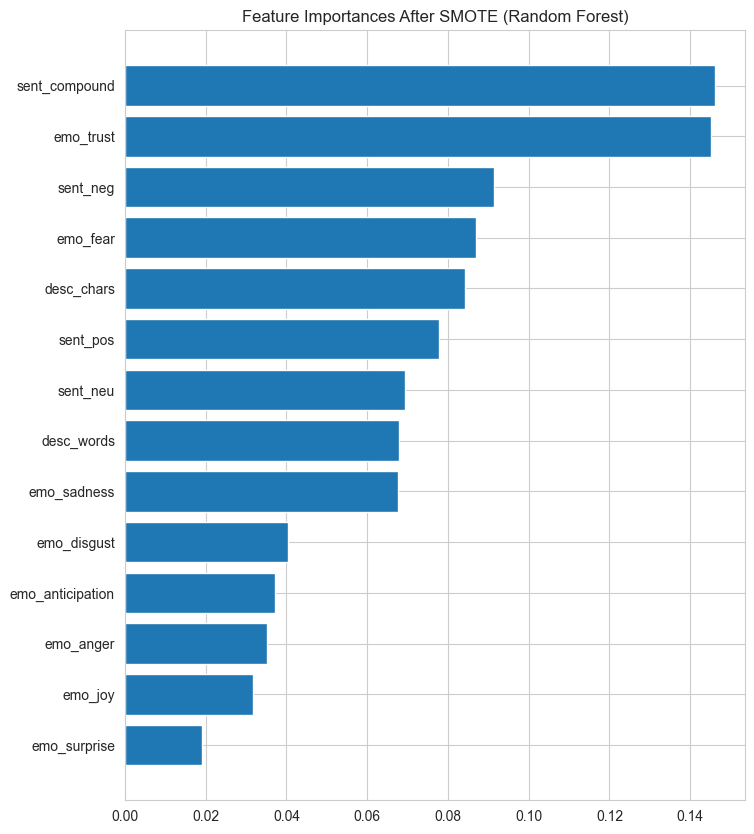

In [ ]:
#using the same test set

#Applying SMOTE + Tomek Links to training data only
smt = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

print("Before resampling:", X_train.shape, y_train.value_counts().to_dict())
print("After resampling:", X_train_resampled.shape,
      pd.Series(y_train_resampled).value_counts().to_dict())

#scaling again for logistic regression
scaler = StandardScaler()
X_train_scaled_res = scaler.fit_transform(X_train_resampled)
X_test_scaled_res  = scaler.transform(X_test)

#retraining Logistic Regression
log_reg_res = LogisticRegression(max_iter=3000)
log_reg_res.fit(X_train_scaled_res, y_train_resampled)
y_pred_log_res = log_reg_res.predict(X_test_scaled_res)

print("\n===== Logistic Regression (After SMOTE) =====")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_res))
print(classification_report(y_test, y_pred_log_res, digits=4))

#retraining Random Forest
rf_res = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)
rf_res.fit(X_train_resampled, y_train_resampled)
y_pred_rf_res = rf_res.predict(X_test)

print("\n===== Random Forest (After SMOTE) =====")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_res))
print(classification_report(y_test, y_pred_rf_res, digits=4))

#Feature Importances for Random Forest
importances = rf_res.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 10))
plt.barh(range(len(feature_cols)), importances[indices])
plt.yticks(range(len(feature_cols)), [feature_cols[i] for i in indices])
plt.title("Feature Importances After SMOTE (Random Forest)")
plt.show()

SMOTE allowed the models to correctly identify unsuccessful fundraisers, with Random Forest giving the strongest and most balanced performance.

Sentiment and emotions like trust and fear are more important than description length. This means how the story is told matters more than how much is written.

<Figure size 1200x1000 with 0 Axes>

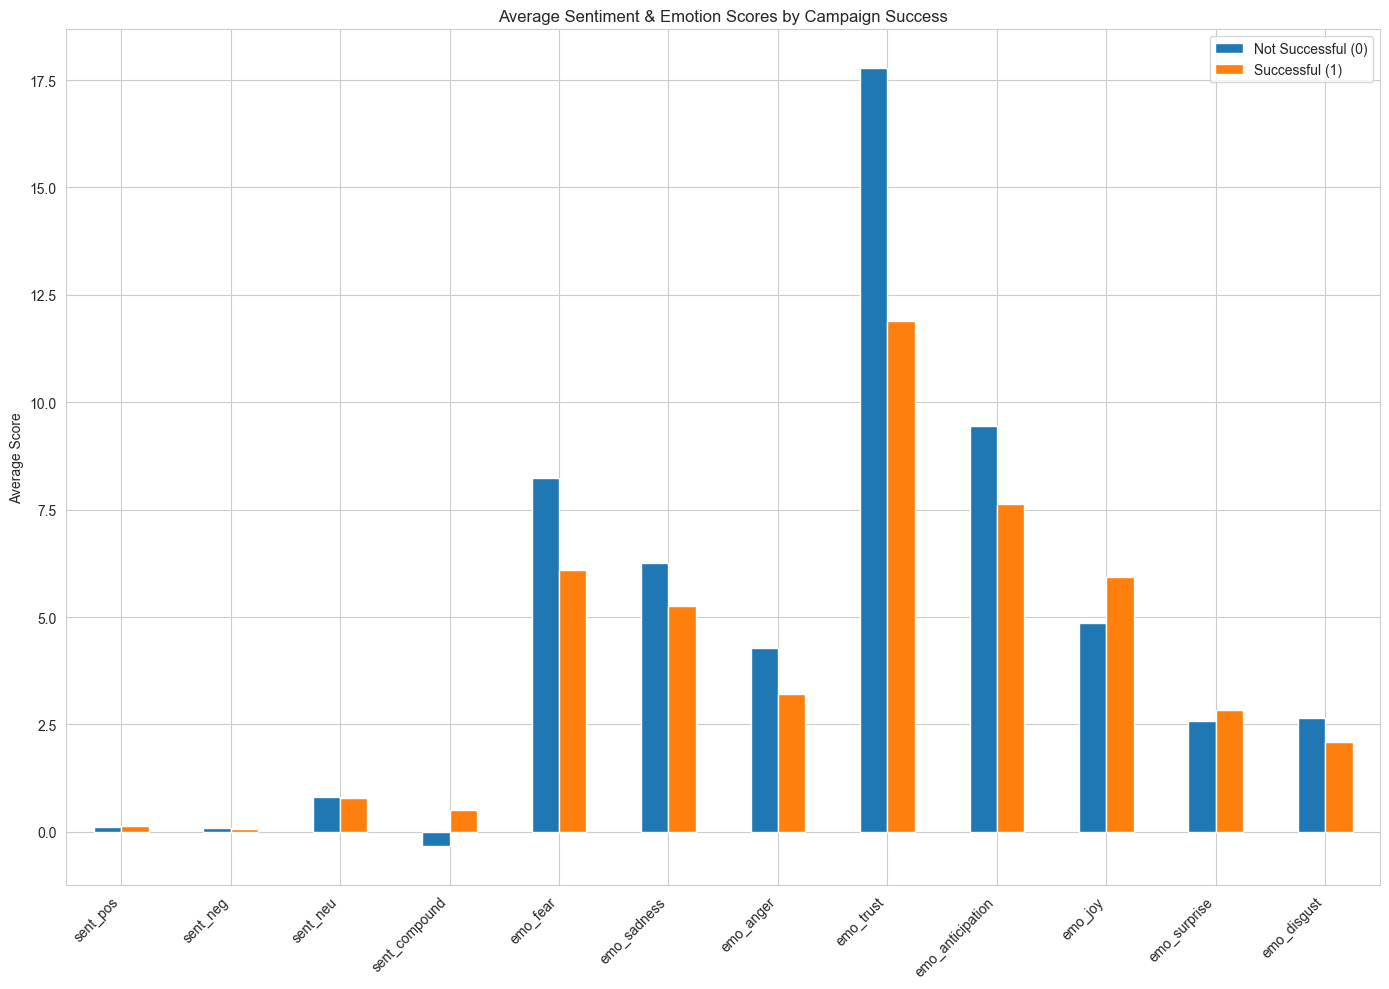

In [ ]:
#Bar chart of average sentiment and emotion values by class (successful vs unsuccessful)
df = pd.read_csv('fundraiser_nlp_prep.csv')

#sentiment + emotion columns
sentiment_cols = ['sent_pos','sent_neg','sent_neu','sent_compound']
emotion_cols = [
    'emo_fear',
    'emo_sadness',
    'emo_anger',
    'emo_trust',
    'emo_anticipation',
    'emo_joy',
    'emo_surprise',
    'emo_disgust'
]

all_cols = sentiment_cols + emotion_cols

#computing averages by class
mean_by_class = df.groupby('successful')[all_cols].mean().transpose()
mean_by_class.columns = ['Not Successful (0)', 'Successful (1)']

plt.figure(figsize=(12, 10))
mean_by_class.plot(kind='bar', figsize=(14, 10))
plt.title("Average Sentiment & Emotion Scores by Campaign Success")
plt.ylabel("Average Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart shows clear emotional differences between successful and unsuccessful fundraisers. Successful campaigns tend to use stronger overall sentiment, especially higher compound scores, while unsuccessful campaigns remain more neutral. The chart also shows that trust words (like “support,” “help,” “family,” “community”) appear strongly in both groups, but our Random Forest analysis revealed that trust becomes a positive predictor when combined with clear sentiment and urgency.


Unsuccessful campaigns have higher levels of fear, sadness, and anger, suggesting they describe serious or urgent situations, but may not present these emotions in a way that motivates donors. The model found that negative sentiment and fear-related wording help communicate seriousness, which improves success when paired with strong, emotional storytelling. Overall, the results show that campaigns that communicate emotion clearly — especially through strong sentiment, trust, and urgency — tend to perform better than those that are emotionally flat.


## Reflection

*1. Data Availability and Completeness*

Successful campaigns are removed from the website once funded, leaving gaps in our dataset and potentially biasing the analysis toward ongoing or unsuccessful campaigns.

*2. Web Scraping Restrictions*

Many platforms limit data access. We settled on Milaap, using Selenium and Beautiful Soup to work around its structure and extract the necessary information.


#### What are your initial insights?

Taking a first look at the data, it seems that campaigns in the Animals and Medical categories tend to get more donations. Another interesting thing is that most donors choose to remain anonymous, rather than giving their names. These early observations give us a sense of how people are contributing and which campaigns are attracting more support.


#### Are there any concrete results you can show at this point? If not, why not?

Looking at the data, a few clear patterns stand out. Longer descriptions don’t always lead to more donations or successful campaigns. Campaigns that offer tax benefits tend to get slightly more donations. As expected, Medical campaigns usually receive more donations than other categories. Finally, campaigns that post at least one update tend to get higher average donations, showing that keeping donors informed helps.

#### Going forward, what are the current biggest problems you're facing?

There are no real-time updates for the data we’ve already collected. If any of the scraped records become complete or successful during the course of this project, we won’t be able to track those changes.


#### Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?

Yes :) <br> We need to fix the class imbalances and maybe even think about scraping the website again.

#### Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?

Yes, it’s worth continuing with the project. By analyzing the data, we can identify the key factors that make a campaign successful and understand what helps it attract more donations. <br> <br> We were having second thoughts after seeing the class imbalance but with the well timed LLM talk in the last class we can give ashot of using synthetic data and other techniques.